In [51]:
import numpy as np
from sklearn.utils import check_random_state
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# Pregunta 1
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD
from sklearn.tree import DecisionTreeClassifier as Tree
from sklearn.decomposition import KernelPCA

# Pregunta 2
import pandas as pd
import numpy as np

%matplotlib inline

# Pregunta 1

In [52]:
def do_circles(n=2000,noisy_n=0.05):
    generator = check_random_state(10)
    linspace = np.linspace(0, 2 * np.pi, n // 2 + 1)[:-1]
    outer_circ_x = np.cos(linspace)
    outer_circ_y = np.sin(linspace)

    inner_circ_x = outer_circ_x * .3
    inner_circ_y = outer_circ_y * .3
    X = np.vstack((np.append(outer_circ_x, inner_circ_x),
        np.append(outer_circ_y, inner_circ_y))).T
    y = np.hstack([np.zeros(n // 2, dtype=np.intp),
        np.ones(n // 2, dtype=np.intp)])
    X += generator.normal(scale=noisy_n, size=X.shape)
    X_train, X_test, y_train, y_test = train_test_split(X, y,
    test_size=0.5, random_state=42)
    return X_train,y_train,X_test,y_test

In [53]:
X_train, Y_train,X_test,Y_test= do_circles()

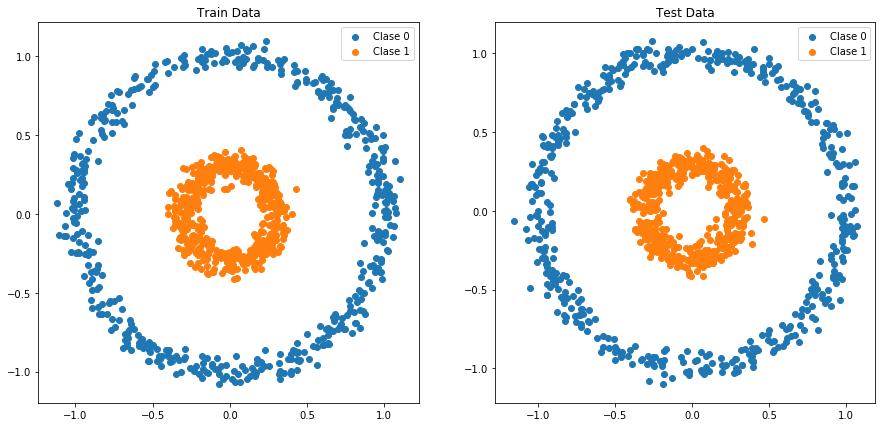

In [54]:
fig,ax = plt.subplots(1,2,figsize=(15,7))
ax[0].scatter(X_train[Y_train == 0,0],X_train[Y_train == 0,1],label="Clase 0")
ax[0].scatter(X_train[Y_train == 1,0],X_train[Y_train == 1,1],label="Clase 1")
ax[0].set_title("Train Data")
ax[1].scatter(X_test[Y_test == 0,0],X_test[Y_test == 0,1],label="Clase 0")
ax[1].scatter(X_test[Y_test == 1,0],X_test[Y_test == 1,1],label="Clase 1")
ax[1].set_title("Test Data")
ax[0].legend()
ax[1].legend()
plt.show()

In [63]:
cm = plt.cm.RdBu
cm_bright = ListedColormap(['#FF0000', '#0000FF'])

def plot_classifier(clf,X_train,Y_train,X_test,Y_test,model_type):
    f, ax = plt.subplots(1, 1,figsize=(9, 8))
    XX, YY = np.mgrid[-2:2:200j, -2:2:200j]
   
    if hasattr(clf, "decision_function"):
        Z = clf.predict_proba(np.c_[XX.ravel(), YY.ravel()])[:,0]
    else:
        Z = clf.predict(np.c_[XX.ravel(), YY.ravel()])

    Z = Z.reshape(XX.shape) > 0.5
    ax.contourf(XX, YY, Z, cmap=cm, alpha=.8)
    
    ax.scatter(X_train[:,0],X_train[:,1],c=Y_train, cmap=cm_bright,
                   edgecolors='k')
    ax.scatter(X_test[:,0],X_test[:,1],c=Y_test, cmap=cm_bright,
                   edgecolors='k', alpha=0.7)
    ax.set_xlim(XX.min(), XX.max())
    ax.set_ylim(YY.min(), YY.max())
    ax.set_xticks(())
    ax.set_yticks(())
    plt.show()

  32/1000 [..............................] - ETA: 15s

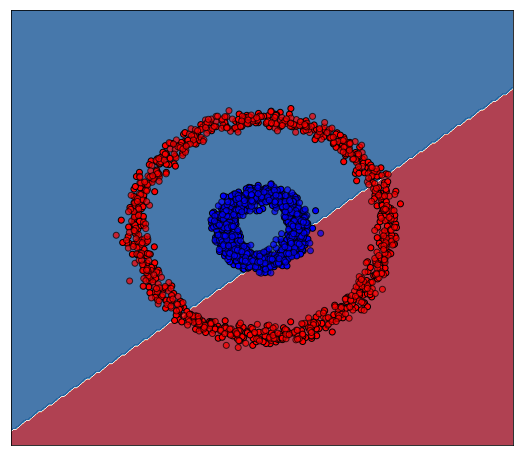

sigmoid : 0.583
  32/1000 [..............................] - ETA: 15s

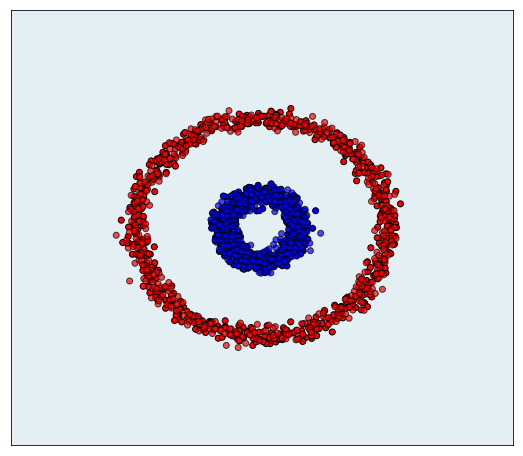

tanh : 0.493
  32/1000 [..............................] - ETA: 15s

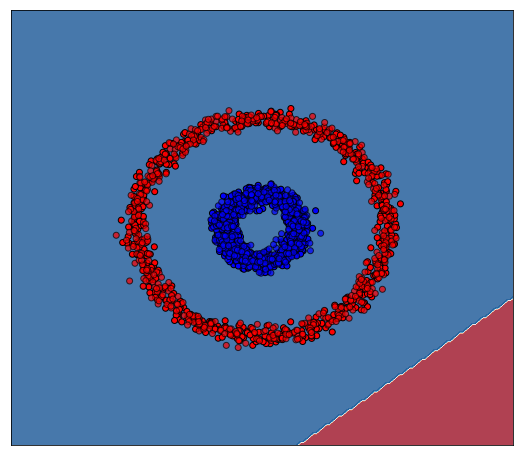

relu : 0.0


In [70]:
n_h=1
activation = "sigmoid"
for activation in ["sigmoid", "tanh","relu"]:
    np.random.seed(0)
    model = Sequential()
    model.add(Dense(n_h,input_dim=X_train.shape[1], activation=activation))
    model.compile(optimizer=SGD(lr=1), loss='binary_crossentropy', metrics=['accuracy'])
    model.fit(X_train, Y_train, epochs=100, batch_size=100, verbose=0)
    scores = model.evaluate(X_test, Y_test)
    test_acc = scores[1]
    plot_classifier(model,X_train,Y_train,X_test,Y_test,"ann")
    print(activation, ":",test_acc)

# No se que estoy haciendo mal acá nada funciona :/ 

2
  32/1000 [..............................] - ETA: 16sAccuracy: 0.597


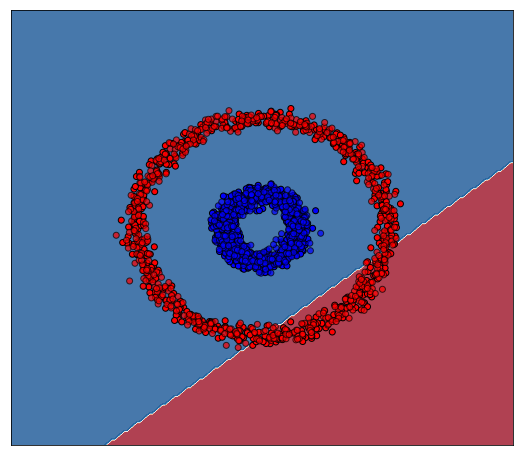

4
  32/1000 [..............................] - ETA: 16sAccuracy: 0.407


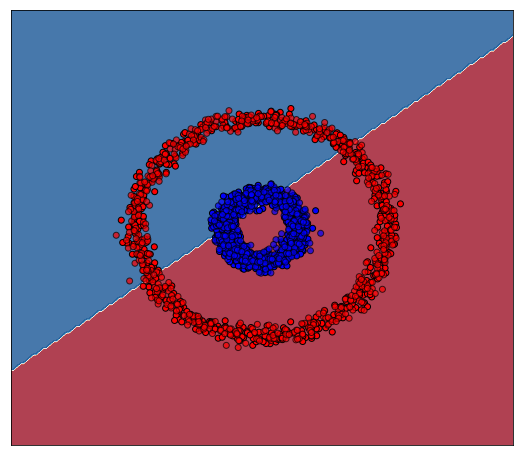

8
  32/1000 [..............................] - ETA: 16sAccuracy: 0.407


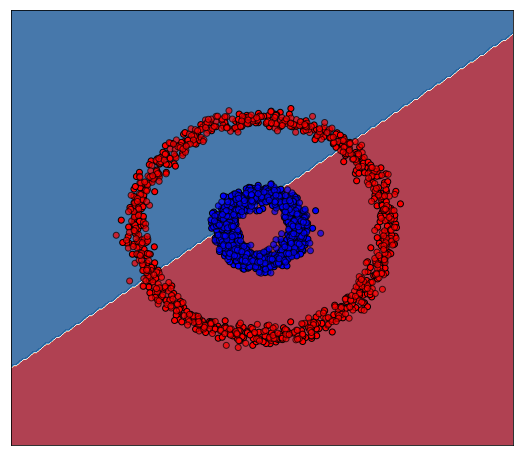

16
  32/1000 [..............................] - ETA: 16sAccuracy: 0.641


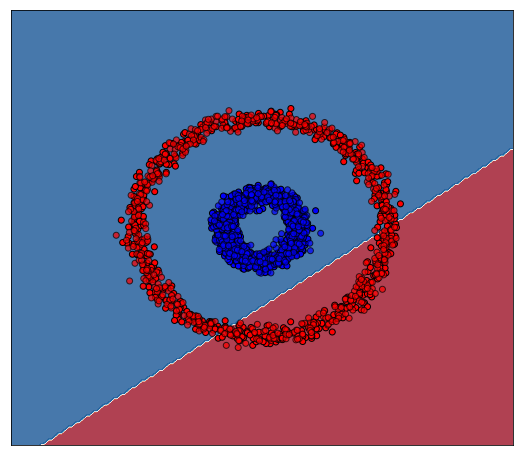

32
  32/1000 [..............................] - ETA: 16sAccuracy: 0.413


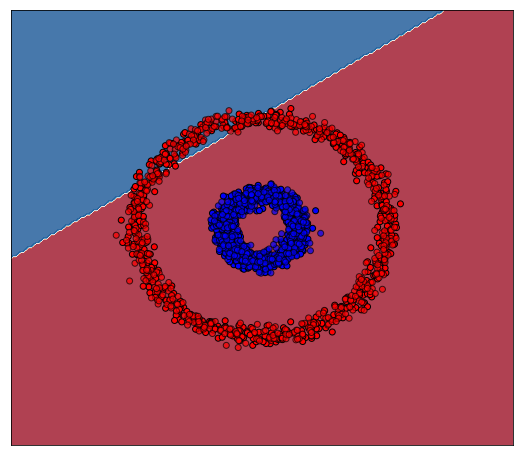

In [71]:
acc_list = []
activation = "sigmoid"
n_hs = np.logspace(1,5,base=2,num=5,dtype=int)
for n_h in n_hs:
    print(n_h)
    model = Sequential()
    model.add(Dense(n_h, input_dim=X_train.shape[1], kernel_initializer='uniform', activation=activation))
    #Se agrega esta softmax para tener la dimensión de output = 1 
    model.add(Dense(1, kernel_initializer='uniform', activation=activation))
    model.compile(optimizer=SGD(lr=1), loss='binary_crossentropy', metrics=['accuracy'])
    model.fit(X_train, Y_train, epochs=100, batch_size=100, verbose=0)
    scores = model.evaluate(X_test, Y_test)
    test_acc = scores[1]
    print("Accuracy:",test_acc)
    plot_classifier(model,X_train,Y_train,X_test,Y_test,"ann")

## Árboles de Clasificación 

Test Accuracy = 0.670000
1


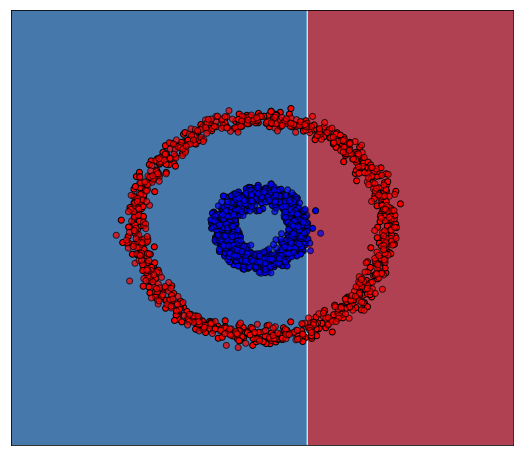

In [72]:
clf=Tree(criterion='gini',splitter='best',random_state=0,max_depth=1)
clf.fit(X_train,Y_train)
acc_test = clf.score(X_test,Y_test)
print("Test Accuracy = %f"%acc_test)
print(clf.tree_.max_depth)
plot_classifier(clf,X_train,Y_train,X_test,Y_test,'tree')

Max Depth: 2


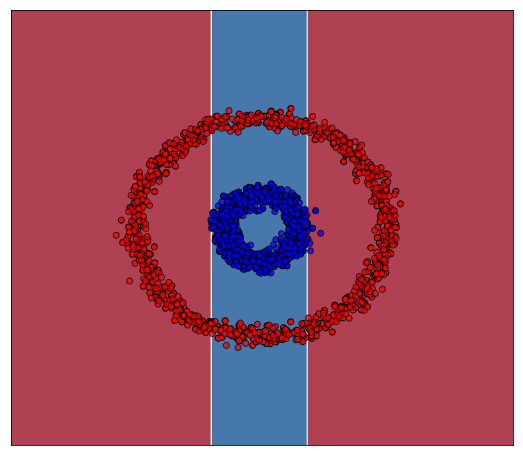

Max Depth: 4


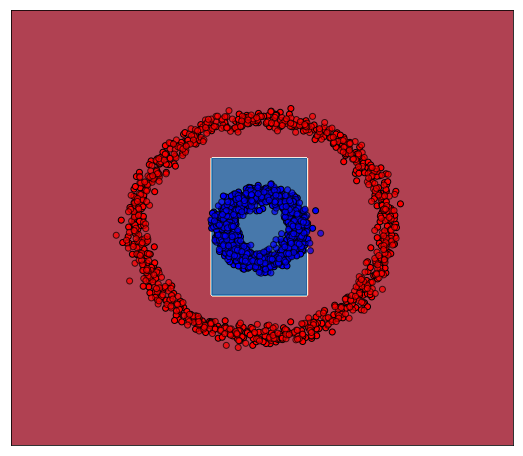

Max Depth: 6


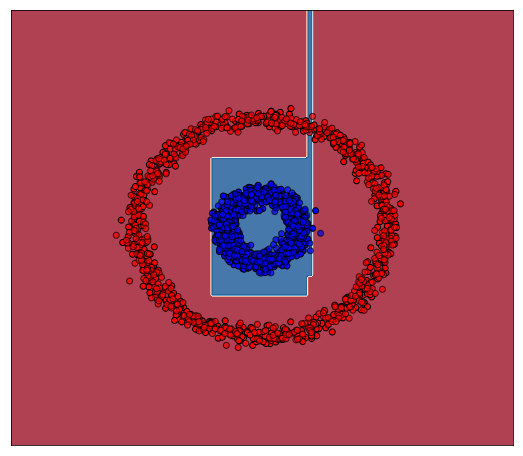

In [73]:
n_ts = list(range(2,22,2))
acc_tests = []
acc_trains = []
for n_t in n_ts:
    clf=Tree(criterion='gini',splitter='best',random_state=0,max_depth=n_t)
    clf.fit(X_train,Y_train)
    acc_test = clf.score(X_test,Y_test)
    acc_train = clf.score(X_train,Y_train)
    if n_t < 7:
        print("Max Depth:", n_t)
        plot_classifier(clf,X_train,Y_train,X_test,Y_test,'tree')  
    acc_tests.append(acc_test)
    acc_trains.append(acc_train)

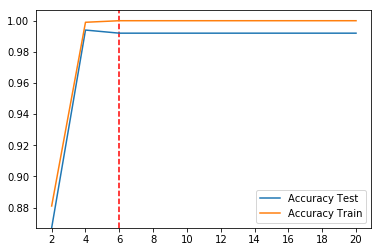

In [74]:
plt.axvline(n_ts[np.argmax(acc_trains)], color="red", ls="--")
plt.plot(n_ts,acc_tests,label="Accuracy Test")
plt.plot(n_ts,acc_trains,label="Accuracy Train")
plt.xticks(n_ts,label="Max Train")
plt.ylim(bottom=np.min(acc_tests))
plt.legend()
plt.show()

## Manifold (KernelPCA)

In [75]:
kpca = KernelPCA(n_components=2,kernel="rbf", gamma=5)
kpca = kpca.fit(X_train)
Xkpca_train = kpca.transform(X_train)
Xkpca_test = kpca.transform(X_test)

In [ ]:
acc_list = []
activation = "sigmoid"
n_hs = np.logspace(1,5,base=2,num=5,dtype=int)
for n_h in n_hs:
    print(n_h)
    model = Sequential()
    model.add(Dense(n_h, input_dim=Xkpca_train.shape[1], kernel_initializer='uniform'))
    model.add(Dense(1, kernel_initializer='uniform', activation=activation))
    model.compile(optimizer=SGD(lr=1), loss='binary_crossentropy', metrics=['accuracy'])
    model.fit(Xkpca_train, Y_train, epochs=100, batch_size=100, verbose=0)
    scores = model.evaluate(Xkpca_test, Y_test)
    test_acc = scores[1]
    print("Accuracy:",test_acc)
    plot_classifier(model,Xkpca_train,Y_train,Xkpca_test,Y_test,"ann")

2
  32/1000 [..............................] - ETA: 20sAccuracy: 1.0


### Arbol de Clasificación

Max Depth: 2


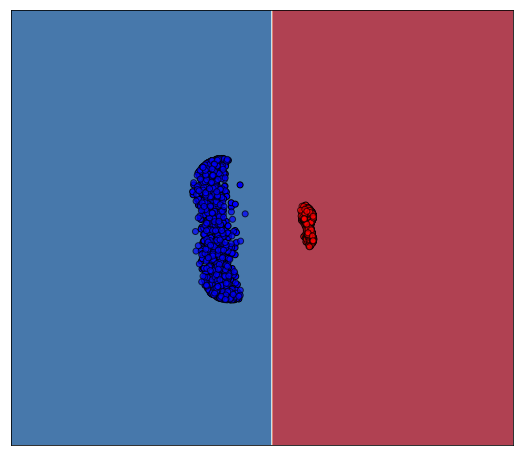

Max Depth: 4


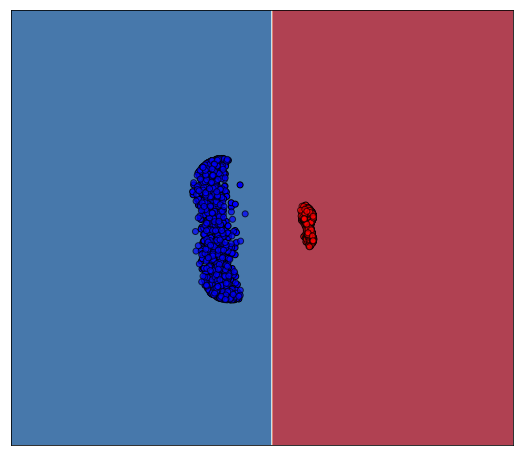

Max Depth: 6


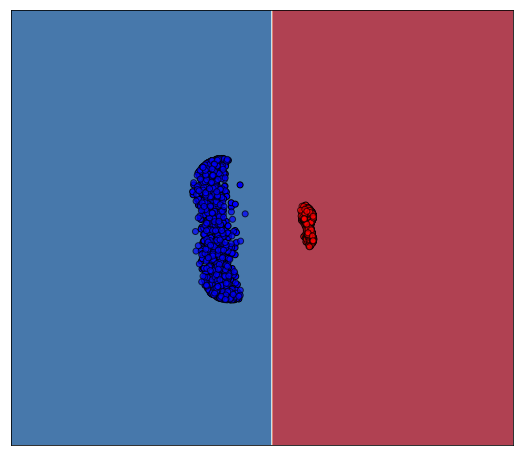

In [40]:
n_ts = list(range(2,22,2))
acc_tests = []
acc_trains = []
for n_t in n_ts:
    clf=Tree(criterion='gini',splitter='best',random_state=0,max_depth=n_t)
    clf.fit(Xkpca_train,Y_train)
    acc_test = clf.score(Xkpca_test,Y_test)
    acc_train = clf.score(Xkpca_train,Y_train)
    if n_t < 7:
        print("Max Depth:", n_t)
        plot_classifier(clf,Xkpca_train,Y_train,Xkpca_test,Y_test,'tree')  
    acc_tests.append(acc_test)
    acc_trains.append(acc_train)

In [ ]:
plt.axvline(n_ts[np.argmax(acc_tests)], color="red", ls="--")
plt.plot(n_ts,acc_tests,label="Accuracy Test")
plt.plot(n_ts,acc_trains,label="Accuracy Train")
plt.xticks(n_ts)
plt.ylim(bottom=np.min(acc_tests))
plt.legend()
plt.show()

# Pregunta 2

In [43]:
dftrain = pd.read_csv('bike_sharing_train.csv')
dfval = pd.read_csv('bike_sharing_val.csv')
dftest = pd.read_csv('bike_sharing_test.csv')
ntrain = len(dftrain)
nval = len(dftrain) + len(dfval)
df = pd.concat([dftrain,dfval,dftest])
df['hour'] = pd.to_datetime(df['datetime']).apply(lambda x: x.strftime('%H'))
df['hour'] = pd.to_numeric(df['hour'])
print('\nSummary - dataframe completo:\n')
df.describe()


Summary - dataframe completo:



,Unnamed: 0,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,hour
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,5442.500000,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132,11.541613
std,3142.661849,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454,6.915838
min,0.000000,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,2721.250000,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000,6.000000
50%,5442.500000,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000,12.000000
75%,8163.750000,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000,18.000000
max,10885.000000,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000,23.000000


/home/tronco/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


SCORE TEST=0.019096
KAGG EVAL TRAIN =0.040512
KAGG EVAL TEST =0.632551


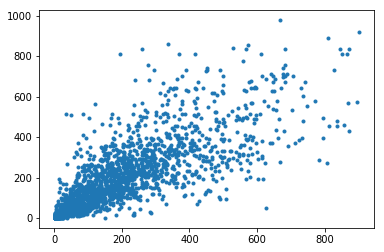

In [44]:
def eval_bikemodel(y_predict,y_true):
    diff = np.log(y_predict+1.0) - np.log(y_true+1.0)
    return np.sqrt(np.sum(np.square(diff))/len(y_predict))
Xdf=df.loc[:,['season','holiday','workingday','weather','temp','atemp',
'humidity','windspeed','hour']]
Ydf=df.ix[:,'count']
X_train = Xdf[0:ntrain].values
X_val = Xdf[ntrain:nval].values
X_test = Xdf[nval:].values
Y_train = Ydf[0:ntrain].values
Y_val = Ydf[ntrain:nval].values
Y_test = Ydf[nval:].values

model = Tree(random_state=0)
model.fit(X_train,Y_train)
score_test = model.score(X_test,Y_test)
print("SCORE TEST=%f"%score_test)
Y_pred_train = model.predict(X_train)
Y_pred_val = model.predict(X_val)
Y_pred_test = model.predict(X_test)
kagg_train = eval_bikemodel(Y_pred_train,Y_train)
kagg_val = eval_bikemodel(Y_pred_val,Y_val)
kagg_test = eval_bikemodel(Y_pred_test,Y_test)
print("KAGG EVAL TRAIN =%f"%kagg_train)
print("KAGG EVAL TEST =%f"%kagg_test)
plt.plot(Y_test,Y_pred_test,'.')
plt.show()

In [45]:
model = Tree(random_state=0,max_depth=20)
model.fit(X_train,Y_train)
Y_pred_val = model.predict(X_val)
kagg_val = eval_bikemodel(Y_pred_val,Y_val)
print("KAGG EVAL VAL =%f"%kagg_val)

KAGG EVAL VAL =0.631958


In [46]:
df['cday'] = pd.to_datetime(df['datetime']).dt.dayofweek#0:lunes,6:domingo
df['cday'] = pd.to_numeric(df['cday'])
Xdf=df.ix[:,['season','holiday','workingday','weather','temp','atemp',
'humidity','windspeed','hour','cday']]

In [47]:
#load dataframes as before ...
df = pd.concat([dftrain,dfval,dftest])
df['hour'] = pd.to_datetime(df['datetime']).apply(lambda x: x.strftime('%H'))
df['cday'] = pd.to_datetime(df['datetime']).dt.dayofweek
df['hour'] = pd.to_numeric(df['hour'])
df['cday'] = pd.to_numeric(df['cday'])
Xdf=df.loc[:,['season','holiday','workingday','weather','temp','atemp',
'humidity','windspeed','hour','cday']]
#PASO IMPORTANTE MAS ABAJO ...
Xdf = pd.get_dummies(Xdf,columns=['season', 'weather','hour','cday'])
Ydf=df.loc[:,'count']
from sklearn.preprocessing import StandardScaler
scalerX = StandardScaler()
X_train = scalerX.fit_transform(X_train)
X_val = scalerX.fit_transform(X_val)
X_test = scalerX.transform(X_test)
from sklearn.svm import SVR
model = SVR()
model.fit(X_train,Y_train)
Y_pred_train = model.predict(X_train)
Y_pred_val = model.predict(X_val)
Y_pred_test = model.predict(X_test)

In [48]:
model = SVR(C=1,epsilon=0.01)
kagg_train = eval_bikemodel(Y_pred_train,Y_train)
kagg_val = eval_bikemodel(Y_pred_val,Y_val)
print("KAGG EVAL TRAIN =%f"%kagg_train)
print("KAGG EVAL VAL =%f"%kagg_val)

KAGG EVAL TRAIN =nan
KAGG EVAL VAL =nan


/home/tronco/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in log
  


In [49]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=10)
mse_cv = 0
for train, val in kf.split(Xm):
    model = #define your model
    model.fit(Xm[train], ym[train])
    yhat_val = model.predict(Xm[val])
    ytrue_val = ym[val]
    score_fold = eval_bikemodel(yhat_val,ytrue_val)
    mse_cv += score_fold
mse_cv = mse_cv / 10

SyntaxError: invalid syntax (<ipython-input-49-618521f7fc3d>, line 5)

In [ ]:
Ydf=df.loc[:,'count'] #demanda total
Ydf=df.loc[:,'registered'] #demanda registrada
Ydf=df.loc[:,'casual'] #demanda casual

In [ ]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators=10,max_depth=max_depth,random_state=0)